---
<h1 style="text-align: center;">IF867 - Introdução à Aprendizagem Profunda</h1>
<h2 style="text-align: center;">1ª atividade prática</h2>

---
---
*Discente:*

* Gabriel D'assumpção de Carvalho - gdc2@cin.ufpe.br

*Curso:*

* Ciências Atuariais - 7º Período

<div style="text-align: center;">
29/11/2024
</div>

# Introdução

O objetivo desta atividade é desenvolver um algoritmo de MPL (Multilayer Perceptron) sem o uso de bibliotecas específicas de machine learning. Portanto, não nos aprofundamos em uma análise exploratória mais robusta. 
Não foi realizada nenhuma investigação detalhada para avaliar o impacto das duplicatas na distribuição das variáveis ou para investigar se essas duplicações podem ser atribuídas a erros de arredondamento.

# Importações

## Bibliotecas

In [51]:
import numpy as np # Data manipulation
import pandas as pd  # Data manipulation
pd.options.display.float_format = "{:.4f}".format
import matplotlib.pyplot as plt # Data visualization
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)  # Data visualization

# Nueral network
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

# Desativa todos os avisos
import warnings

warnings.filterwarnings("ignore")

## Datasets

### Insurence

Insurance é uma base de dados disponível no [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data). A base contém
1.338 observações e 6 características, com o custo do seguro médico como variável alvo. A seguir, estão
as variáveis da base de dados:


| Atributo   | Descrição                                                      | Tipo                    |
|------------|----------------------------------------------------------------|-------------------------|
| *Idade*     | A idade da pessoa segurada.                                    | Inteiro                 |
| *Sexo*      | Gênero (masculino ou feminino) do segurado.                     | Categórico - Binário    |
| *IMC*        | Índice de Massa Corporal: uma medida de gordura corporal baseada na altura e no peso. | Contínuo                |
| *Crianças*   | O número de dependentes cobertos.                               | Inteiro                 |
| *Fumante*    | Se o segurado é fumante (sim ou não).                           | Categórico - Binário    |
| *Região*     | A área geográfica de cobertura.                                | Categórico - Nominal    |
| *Encargos*   | Os custos do seguro médico incorridos pelo segurado.            | Contínuo                |

In [3]:
# Urls of the datasets
insurence = pd.read_csv(
    "https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/refs/heads/main/projeto/data/insurance.csv"
)

insurence.head()

,age,sex,imc,children,smoke,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Para uma análise exploratória mais detalhada, consulte o seguinte repositório:
[Modelagem de Redes Neurais para
Previsão de Custos em Seguros de
Saúde](https://github.com/gabrieldadcarvalho/neural_network/blob/main/projeto/Neural_Network_Projetc.pdf)

### Iris

O dataset Iris é uma base de dados clássica e amplamente utilizada em machine learning, disponível no [Kaggle](https://www.kaggle.com/datasets/uciml/iris?select=Iris.csv). Ele contém informações sobre três espécies de plantas do gênero *Iris*: *Iris setosa*, *Iris versicolor* e *Iris virginica*. O objetivo principal ao utilizar este dataset é a classificação das espécies, dadas as características de suas pétalas e sépalas.

O dataset consiste em 150 observações, divididas igualmente entre as três espécies, e possui 5 atributos, onde um deles corresponde ao nome da espécie e os outros quatro as características das pétalas e sépalas. Os atributos são:

| Atributo         | Descrição                                                                             | Tipo       | Unidade  |
|------------------|---------------------------------------------------------------------------------------|------------|----------|
| *sepal length*  | Comprimento da sépala.                                                               | Contínuo   | centímetros |
| *sepal width*  | Largura da sépala.                                                                  | Contínuo   | centímetros |
| *petal length* | Comprimento da pétala.                                                              | Contínuo   | centímetros |
| *petal width*  | Largura da pétala.                                                                   | Contínuo   | centímetros |
| *species*      | Espécie da planta iris (setosa, versicolor ou virginica).                                        | Categórico | -        |

In [4]:
# Url of the iris dataset
url_iris = "https://raw.githubusercontent.com/gabrieldadcarvalho/deep_learning/refs/heads/master/exercise_list/01/data/iris/iris.data"

# Read of the arquives CSV
iris = pd.read_csv(url_iris, sep=",", header=None)

# Adding name of the variables
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# 5 first rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Tratamento dos dados

Nessa sessão vai ser elaborado funções para fazer um breve tratamento no banco de dados para facilitar o aprendizado da rede.

In [5]:
# Function to print statistics
def print_stats(df, action, missing=False):
    if missing:
        print(f"Variables with missing values: \n{df.isna().sum()}")
        print("==" * 20)
        print(f"Total of missing values: \n{df.isna().sum().sum()}")
        print("==" * 20)
        if df.isna().any().any():
            print(f"Observations of missing values: \n{df[df.isna().any(axis=1)]}")
            print("==" * 20)
    else:
        print(f"Variables with duplicated values: \n{df.duplicated().sum()}")
        print("==" * 20)
        print(f"Total of duplicated values: \n{df.duplicated().sum()}")
        print("==" * 20)
        if df.duplicated().any():
            print(
                f"Observations of duplicated values: \n{df[df.duplicated(keep=False)]}"
            )
            print("==" * 20)

    print(f"Old shape: {df.shape}")

    return df


# Function for removing missing values
def drop_nan(df):
    # Show statistics
    print_stats(df, action="dropna", missing=True)

    # Drop of missing values
    df_cleaned = df.dropna()
    print(f"New shape: {df_cleaned.shape}")
    return df_cleaned


# Function for removing duplicated values
def drop_duplicates(df):
    # Show Statistics
    print_stats(df, action="drop_duplicates", missing=False)

    # Drop of duplicated values
    df_cleaned = df.drop_duplicates()
    print(f"New shape: {df_cleaned.shape}")
    return df_cleaned


# Function for transforming categorical variables
def trans_categorical(df):
    print(df.info())
    print("==" * 20)

    categorical_cols = df.select_dtypes(include=["object"]).columns
    category_dict = {}  # Initialize an empty dictionary to store mappings

    if len(categorical_cols) > 0:
        for column in categorical_cols:
            category_mapping = {
                category: index
                for index, category in enumerate(pd.Categorical(df[column]).categories)
            }
            df[column] = df[column].map(category_mapping)
            category_dict[column] = (
                category_mapping  # Store the mapping for this column
            )

            print(f"Column: {column} has {df[column].nunique()} categories")
            print("Mapping:", category_mapping)
            print("==" * 20)

        print("Transformation was made successfully!")
        print("==" * 20)
        print("New info:")
        print(df.info())
    else:
        print("No categorical columns found.")

    return df, category_dict


def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]


# Function for splitting dataset into train and test
def split(x, y, percent, seed):
    np.random.seed(seed)
    l = np.arange(x.shape[0])
    np.random.shuffle(l)
    train_size = int(len(l) * percent)
    train_indices = l[:train_size]
    test_indices = l[train_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    Y_train, Y_test = y[train_indices], y[test_indices]
    return X_train, X_test, Y_train, Y_test

## Insurence

### Transformação Categórica

In [6]:
insurence, categ_wine = trans_categorical(insurence)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   imc       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoke     1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Column: sex has 2 categories
Mapping: {'female': 0, 'male': 1}
Column: smoke has 2 categories
Mapping: {'no': 0, 'yes': 1}
Column: region has 4 categories
Mapping: {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
Transformation was made successfully!
New info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age      

Podemos observar na função acima que o banco de dados 'insurance' contém três variáveis categóricas: sexo, fumo (smoke) e região (region). Para realizar a análise, foi feita uma transformação dessas variáveis em valores numéricos. O sexo foi codificado como 0 e 1, o fumo também como 0 e 1, e a região foi convertida nos valores 0, 1 e 2.

### Removendo Valores Ausentes

In [7]:
insurence = drop_nan(insurence)

Variables with missing values: 
age         0
sex         0
imc         0
children    0
smoke       0
region      0
charges     0
dtype: int64
Total of missing values: 
0
Old shape: (1338, 7)
New shape: (1338, 7)


Conforme observado nas funções anteriores, o dataframe do banco de dados de seguro não apresenta dados ausentes em nenhuma de suas variáveis.

### Removendo duplicidades

In [8]:
insurence = drop_duplicates(insurence)

Variables with duplicated values: 
1
Total of duplicated values: 
1
Observations of duplicated values: 
     age  sex    imc  children  smoke  region    charges
195   19    1  30.59         0      0       1  1639.5631
581   19    1  30.59         0      0       1  1639.5631
Old shape: (1338, 7)
New shape: (1337, 7)


No entanto, foram identificados 2 dados duplicados, sendo assim foi removido uma das observações passando de 1338 observações para 1337.

### Divisão de Treinamento, Validação e Teste

In [9]:
X_train_insurance, X_test_insurance, Y_train_insurance, Y_test_insurance = split(
    insurence.drop("charges", axis=1).values, insurence["charges"].values, 0.8, 42
)

Na função acima, os dados foram divididos inicialmente em 80% para treinamento (1.069 observações) e 20% para teste (267 observações).

### Padronização Z-score

Para padronizar os dados, será utilizada a técnica do Z-score, que ajusta a base de treinamento para ter desvio padrão igual a 1 e média igual a 0. Após esse ajuste, o desvio padrão e a média calculados na base de treinamento serão armazenados e aplicados posteriormente à base de teste. Essa abordagem evita que a padronização introduza informações da base de teste na base de treinamento, o que poderia enviesar o modelo. Esse cuidado é especialmente importante em situações reais, onde as novas observações (teste) não estão disponíveis durante o treinamento.

In [10]:
X_mean_insurance = np.mean(X_train_insurance, axis=0)
X_std_insurance = np.std(X_train_insurance, axis=0)

Y_mean_insurance = np.mean(Y_train_insurance)
Y_std_insurance = np.std(Y_train_insurance)

X_train_insurance = (X_train_insurance - X_mean_insurance) / X_std_insurance
Y_train_insurance = (Y_train_insurance - Y_mean_insurance) / Y_std_insurance

X_test_insurance = (X_test_insurance - X_mean_insurance) / X_std_insurance
Y_test_insurance = (Y_test_insurance - Y_mean_insurance) / Y_std_insurance

## Iris

### Transformação Categórica

In [11]:
iris, categ_iris = trans_categorical(iris)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Column: species has 3 categories
Mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Transformation was made successfully!
New info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 n

No banco de dados "iris", a variável target é categórica e multiclasse, com as categorias: Iris-setosa, Iris-versicolor e Iris-virginica. Para facilitar o processamento, essas categorias foram transformadas em valores numéricos: 0, 1 e 2, respectivamente.

### Removendo Valores Ausentes

In [12]:
iris = drop_nan(iris)

Variables with missing values: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Total of missing values: 
0
Old shape: (150, 5)
New shape: (150, 5)


Também não foram identificados valores ausentes em nenhuma das variáveis.

### Removendo Valores Duplicados

In [13]:
iris = drop_duplicates(iris)

Variables with duplicated values: 
3
Total of duplicated values: 
3
Observations of duplicated values: 
     sepal_length  sepal_width  petal_length  petal_width  species
9             4.9          3.1           1.5          0.1        0
34            4.9          3.1           1.5          0.1        0
37            4.9          3.1           1.5          0.1        0
101           5.8          2.7           5.1          1.9        2
142           5.8          2.7           5.1          1.9        2
Old shape: (150, 5)
New shape: (147, 5)


Ao verificar a presença de valores duplicados, foram identificadas 3 observações repetidas da espécie Iris-setosa e 2 da espécie Iris-virginica. Como resultado, foram removidas 2 observações da Iris-setosa e 1 da Iris-virginica, totalizando 3 remoções. Com isso, o número de registros foi reduzido de 150 para 147, representando uma perda de apenas 2% da base de dados, o que é considerado um impacto mínimo na integridade do conjunto.

### Divisão de Treinamento, Validação e Teste

In [14]:
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = split(
    iris.drop("species", axis=1).values, iris["species"].values, 0.8, 42
)

In [15]:
Y_train_iris_one_hot = one_hot_encode(Y_train_iris, 3)

### Padronização Z-score

In [16]:
X_mean_iris = np.mean(X_train_iris, axis=0)
X_std_iris = np.std(X_train_iris, axis=0)


X_train_iris = (X_train_iris - X_mean_iris) / X_std_iris

X_test = (X_test_iris - X_mean_iris) / X_std_iris


# Modelo

In [17]:
def relu(net):
    return np.maximum(0, net)


def d_relu(net):
    return np.where(net > 0, 1, 0)


def linear(net):
    return net


def d_linear(net):
    return 1


def sigmoid(net):
    return 1 / (1 + np.exp(-net))


def d_sigmoid(net):
    return sigmoid(net) * (1 - sigmoid(net))


def softmax(net):
    exp_net = np.exp(net)
    return exp_net / np.sum(exp_net)


def d_softmax(net):
    return softmax(net) * (1 - softmax(net))


def tanh(x):
    return np.tanh(x)


def d_tanh(x):
    return 1 - np.tanh(x) ** 2


def categorical_crossentropy(y_true, y_pred):
    # Clipping to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.sum(y_true * np.log(y_pred))


def d_categorical_crossentropy(y_true, y_pred):
    # Clipping to avoid division by zero
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -(y_true / y_pred)


def mse(y_true, y_pred):
    return np.mean(np.power((y_pred - y_true), 2))


def d_mse(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size


class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        raise NotImplementedError

    def backward(self, output_error, learnign_rate):
        raise NotImplementedError


class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.normal(
            0, np.sqrt(2 / (input_size + output_size)), (input_size, output_size)
        )
        self.bias = np.zeros(output_size)
        self.weights_cache = np.zeros_like(self.weights)
        self.bias_cache = np.zeros_like(self.bias)

    def forward(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward(
        self, output_error, learning_rate, l1_lambda = 0, l2_lambda = 0
    ):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.reshape(1, -1).T, output_error.reshape(1, -1))
        bias_error = np.sum(output_error, axis=0, keepdims=True)

        if l1_lambda > 0 and l2_lambda > 0:
            if np.random.randint(2) == 0:
                weights_error += l1_lambda * np.sign(self.weights)
            else:
                weights_error += l2_lambda * self.weights
        else:
            weights_error += l1_lambda * np.sign(self.weights) + l2_lambda * self.weights

        self.weights_cache += weights_error**2
        self.bias_cache += bias_error**2

        self.weights -= learning_rate * weights_error / (np.sqrt(self.weights_cache) + 1e-8)
        self.bias -= learning_rate * bias_error / (np.sqrt(self.bias_cache) + 1e-8)

        return input_error


class ActivationLayer(Layer):
    def __init__(self, activation, activation_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative

    def forward(self, input):
        self.input = input
        self.output = self.activation(self.input)
        return self.output

    def backward(self, output_error, learning_rate):
        return self.activation_derivative(self.input) * output_error


class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_derivative = None

    def add(self, layer):
        self.layers.append(layer)

    def loss_use(self, loss, loss_derivative):
        self.loss = loss
        self.loss_derivative = loss_derivative

    def predict(self, input):
        result = []
        for obs in range(input.shape[0]):
            output = input[obs, :]
            for layer in self.layers:
                output = layer.forward(output)
            result.append(output)
        return np.array(result)

    def train(
        self,
        x_train,
        y_train,
        epoch=100,
        batch_size=10,
        learning_rate=0.01,
        seed=42,
        l1_lambda=0.,
        l2_lambda=0.,
    ):
        np.random.seed(seed)
        self.batch_size = batch_size
        self.total_sample = x_train.shape[0]
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda

        if self.batch_size < 1 or self.batch_size > self.total_sample:
            self.batch_size = self.total_sample

        self.indices = np.random.choice(
            self.total_sample, self.batch_size, replace=False
        )
        self.mini_batch = x_train[self.indices, :]
        y_train = y_train[self.indices]

        losses = []

        for i in range(epoch):
            err = 0
            for obs in range(self.batch_size):
                output = self.mini_batch[obs, :]
                for layer in self.layers:
                    output = layer.forward(output)

                err += self.loss(y_train[obs], output)  # type: ignore

                erro = self.loss_derivative(y_train[obs], output)  # type: ignore
                for layer in reversed(self.layers):
                    if isinstance(layer, FCLayer):
                        erro = layer.backward(
                            erro, learning_rate, self.l1_lambda, self.l2_lambda
                        )
                    else:
                        erro = layer.backward(erro, learning_rate)

            err /= self.batch_size
            print("epoch %d/%d   error=%f" % (i + 1, epoch, err))
            losses.append(err)

        import matplotlib.pyplot as plt

        plt.plot(losses)
        plt.xlabel("epoch")
        plt.ylabel("Loss")
        plt.show()

A estrutura do código implementa uma rede neural feedforward (totalmente conectada) com funcionalidades de regularização L1 e L2, otimização Adagrad e suporte para diferentes funções de ativação e funções de perda. Vamos detalhar cada parte:

**1. Funções de Ativação e suas Derivadas:**

*   **`relu(net)`:** Implementa a função ReLU (Rectified Linear Unit). Retorna `net` se `net` > 0, e 0 caso contrário. É uma função não linear que ajuda a rede a aprender padrões complexos.
*   **`d_relu(net)`:** Calcula a derivada da função ReLU. Retorna 1 se `net` > 0, e 0 caso contrário.
*   **`linear(net)`:** Implementa uma função linear, que apenas retorna o valor de `net` sem modificação.
*   **`d_linear(net)`:** Calcula a derivada da função linear, que é sempre 1.
*   **`sigmoid(net)`:** Implementa a função sigmoide, que mapeia qualquer valor para um intervalo entre 0 e 1. Útil em problemas de classificação binária.
*   **`d_sigmoid(net)`:** Calcula a derivada da função sigmoide.
*   **`softmax(net)`:** Implementa a função softmax, que converte um vetor de valores para uma distribuição de probabilidade (soma 1). Usada em problemas de classificação multiclasse.
*   **`d_softmax(net)`:** Calcula a derivada da função softmax.
*   **`tanh(x)`:** Implementa a função tangente hiperbólica, que mapeia valores para um intervalo entre -1 e 1.
*  **`d_tanh(x)`:** Calcula a derivada da função tangente hiperbólica.

**2. Funções de Perda (Loss Functions) e suas Derivadas:**

*   **`categorical_crossentropy(y_true, y_pred)`:** Implementa a função de perda categorical cross-entropy, usada em problemas de classificação multiclasse. Ela mede a diferença entre a distribuição de probabilidade prevista (`y_pred`) e a real (`y_true`).
    *   Para evitar erros de `log(0)`, um valor muito pequeno (1e-15) é utilizado na saída.
*   **`d_categorical_crossentropy(y_true, y_pred)`:** Calcula a derivada da função categorical cross-entropy.
 *     Para evitar erros de divisão por 0, um valor muito pequeno (1e-15) é usado para fazer a previsão.
*   **`mse(y_true, y_pred)`:** Implementa a função de perda Mean Squared Error (Erro Quadrático Médio). Usada em problemas de regressão. Ela calcula a média do quadrado das diferenças entre a predição e o valor real.
*   **`d_mse(y_true, y_pred)`:** Calcula a derivada da função Mean Squared Error.

**3. Classe `Layer` (Classe Base):**

*   **`__init__(self)`:** Inicializa um objeto da classe Layer. As variáveis `input` e `output` recebem o valor `None` inicialmente.
*   **`forward(self, input)`:**  É um método abstrato que deve ser implementado pelas subclasses. Define a passagem para frente (forward pass), aplicando a lógica da camada na entrada.
*   **`backward(self, output_error, learning_rate)`:** É um método abstrato que deve ser implementado pelas subclasses. Define a retropropagação (backward pass), calculando o erro e ajustando os pesos.

**4. Classe `FCLayer` (Fully Connected Layer):**

*   **`__init__(self, input_size, output_size)`:** Inicializa uma camada totalmente conectada.
    *   `self.weights`: Inicializa os pesos com valores aleatórios de acordo com a distribuição de Xavier (normal). A distribuição de Xavier é uma técnica que inicializa os pesos baseado no número de entradas e saídas, ajudando a rede a convergir mais rápido e reduzir erros de vanishing gradient e exploding gradient.
    *   `self.bias`: Inicializa os bias com zeros.
    *   `self.weights_cache` e `self.bias_cache`: Inicializa os arrays de cache para armazenar a soma dos quadrados dos pesos e bias para o otimizador Adagrad
*   **`forward(self, input)`:** Implementa a passagem para frente.
    *   Armazena o `input` da camada para uso durante a retropropagação.
    *   Calcula a saída multiplicando a entrada pelos pesos (`np.dot(self.input, self.weights)`) e somando o bias.
*   **`backward(self, output_error, learning_rate, l1_lambda=0, l2_lambda=0)`:** Implementa a retropropagação.
     *   Calcula o erro de entrada (`input_error`).
       *  Calcula o erro nos pesos (`weights_error`) com base no erro da saída e na entrada.
         *  Aplica a regularização L1 (Lasso) e L2 (Ridge) aos pesos. Se `l1_lambda` e `l2_lambda` forem maiores que 0, uma das regularizações vai ser aplicada aleatoriamente, se não, as duas serão aplicadas juntas no erro dos pesos.
           *   **L1 Regularization:** Adiciona ao gradiente o termo `l1_lambda * np.sign(self.weights)`, que puxa os pesos em direção a zero.
           *   **L2 Regularization:** Adiciona ao gradiente o termo `l2_lambda * self.weights`, que faz os pesos ficarem menores.
     *   Atualiza os pesos e bias com o algoritmo Adagrad.

**5. Classe `ActivationLayer`:**

*   **`__init__(self, activation, activation_derivative)`:** Inicializa uma camada de ativação. Recebe a função de ativação (`activation`) e sua derivada (`activation_derivative`).
*   **`forward(self, input)`:** Implementa a passagem para frente, aplicando a função de ativação na entrada.
*   **`backward(self, output_error, learning_rate)`:** Implementa a retropropagação, calculando o erro de entrada aplicando a derivada da função de ativação no erro da saída.

**6. Classe `Network`:**

*   **`__init__(self)`:** Inicializa uma rede neural, criando um array vazio de camadas e inicializando `loss` e `loss_derivative` como `None`.
*   **`add(self, layer)`:** Adiciona uma camada ao array de camadas da rede (`self.layers`).
*   **`loss_use(self, loss, loss_derivative)`:** Define a função de perda (`loss`) e sua derivada (`loss_derivative`) que vai ser usada no treinamento da rede.
*   **`predict(self, input)`:** Faz uma predição para cada observação do input, passando a entrada por cada camada da rede.
*  **`train(self, x_train, y_train, epoch=100, batch_size=10, learning_rate=0.01, seed=42, l1_lambda=0.0, l2_lambda=0.0)`:** Implementa o treinamento da rede.
    *   `np.random.seed(seed)`: Garante que os resultados sejam os mesmos toda vez que o código rodar, com o mesmo valor de seed.
    *  `self.batch_size`: Guarda o valor do tamanho da amostra que vai ser usada para o backpropagation.
        *  `self.total_sample`: Guarda o valor do tamanho do conjunto de dados de treinamento.
        *   Se o `batch_size` for menor que 1 ou maior que o tamanho total de amostras, o `batch_size` recebe o valor de total de amostras.
        *   Faz um sorteio aleatório (sem reposição) para escolher as amostras a serem usadas no `batch_size` atual, com os indices das amostras a serem pegas.
        *   Pega os valores das amostras a serem utilizadas para o treinamento em `self.mini_batch`.
        *   Pega os rótulos das amostras a serem utilizadas em `y_train`.
    *   **Loop de Épocas:** Para cada época, itera pelo número de vezes que foi definida.
      *   Para cada amostra do `mini_batch` é feito o `forward` da rede, para pegar os valores de saída.
        *   Calcula o erro da predição atual (`err += self.loss(y_train[obs], output)`) com base na função de perda (`self.loss`).
          *   Calcula o erro para fazer a retropropagação na rede com base na derivada da função de perda (`erro = self.loss_derivative(y_train[obs], output)`).
            *   Faz o `backward` das camadas, de trás para frente, para atualizar os pesos de acordo com o erro (`erro = layer.backward(erro, learning_rate, l1_lambda = self.l1_lambda, l2_lambda = self.l2_lambda)`).
            * Se for do tipo `FCLayer`, passa os parâmetros `l1_lambda` e `l2_lambda`.
          * Calcula o erro médio da época dividindo o valor total pelo tamanho do `batch_size`.
            * Imprime os valores da época atual e o valor do erro.
              * Guarda o erro da época no array `losses`.
    *  Ao final do treinamento, plota o gráfico do erro em cada iteração (época) do treinamento.

**Resumo**

Esta implementação fornece uma estrutura básica para uma rede neural feedforward com:

*   Funções de ativação comuns (ReLU, sigmoid, softmax, tanh).
*   Funções de perda (categorical cross-entropy, MSE).
*   Regularização L1/L2 e método de otimização Adagrad.
*   Flexibilidade para definir a estrutura da rede (número e tipo de camadas).

## Insurance

### Estrutura da Rede

In [18]:
net_insurance_1 = Network()
net_insurance_1.add(FCLayer(X_train_insurance.shape[1], 128))  # Increased neurons
net_insurance_1.add(ActivationLayer(relu, d_relu))  # changed to relu activation
net_insurance_1.add(FCLayer(128, 256))  # Added a layer
net_insurance_1.add(ActivationLayer(relu, d_relu))  # changed to relu activation
net_insurance_1.add(FCLayer(256, 800))
net_insurance_1.add(ActivationLayer(relu, d_relu))  # Changed to relu activation
net_insurance_1.add(FCLayer(800, 256))
net_insurance_1.add(ActivationLayer(relu, d_relu))
net_insurance_1.add(FCLayer(256, 1))
net_insurance_1.add(ActivationLayer(linear, d_linear))
net_insurance_1.loss_use(mse, d_mse)

In [19]:
net_insurance_2 = Network()
net_insurance_2.add(FCLayer(X_train_insurance.shape[1], 128))  # Increased neurons
net_insurance_2.add(ActivationLayer(relu, d_relu))  # changed to relu activation
net_insurance_2.add(FCLayer(128, 256))  # Added a layer
net_insurance_2.add(ActivationLayer(relu, d_relu))  # changed to relu activation
net_insurance_2.add(FCLayer(256, 800))
net_insurance_2.add(ActivationLayer(relu, d_relu))  # Changed to relu activation
net_insurance_2.add(FCLayer(800, 256))
net_insurance_2.add(ActivationLayer(relu, d_relu))
net_insurance_2.add(FCLayer(256, 1))
net_insurance_2.add(ActivationLayer(linear, d_linear))
net_insurance_2.loss_use(mse, d_mse)

Para o banco de dados Insurance, foram propostas duas redes neurais para regressão, ambas com a mesma estrutura. A única diferença entre os modelos é a variação no hiperparâmetro de L2-regularização (normalização).

A estrutura da rede neural é composta por 6 valores de entrada, conectados à primeira camada oculta com 128 neurônios. Essa camada está totalmente conectada à segunda camada oculta com 256 neurônios, que, por sua vez, está conectada à terceira camada com 800 neurônios. A quarta camada possui 256 neurônios, e a camada de saída contém 1 neurônio com função de ativação linear. Todas as camadas ocultas utilizam a função de ativação ReLU.

### Treinamento

epoch 1/1000   error=1.154277
epoch 2/1000   error=1.075733
epoch 3/1000   error=1.030554
epoch 4/1000   error=0.994746
epoch 5/1000   error=0.963940
epoch 6/1000   error=0.936391
epoch 7/1000   error=0.911329
epoch 8/1000   error=0.887817
epoch 9/1000   error=0.865561
epoch 10/1000   error=0.844935
epoch 11/1000   error=0.825523
epoch 12/1000   error=0.807122
epoch 13/1000   error=0.789750
epoch 14/1000   error=0.773016
epoch 15/1000   error=0.757101
epoch 16/1000   error=0.741701
epoch 17/1000   error=0.726857
epoch 18/1000   error=0.712556
epoch 19/1000   error=0.698673
epoch 20/1000   error=0.685376
epoch 21/1000   error=0.672264
epoch 22/1000   error=0.659638
epoch 23/1000   error=0.647193
epoch 24/1000   error=0.634927
epoch 25/1000   error=0.622975
epoch 26/1000   error=0.611333
epoch 27/1000   error=0.599961
epoch 28/1000   error=0.588719
epoch 29/1000   error=0.577607
epoch 30/1000   error=0.566775
epoch 31/1000   error=0.556134
epoch 32/1000   error=0.545661
epoch 33/1000   e

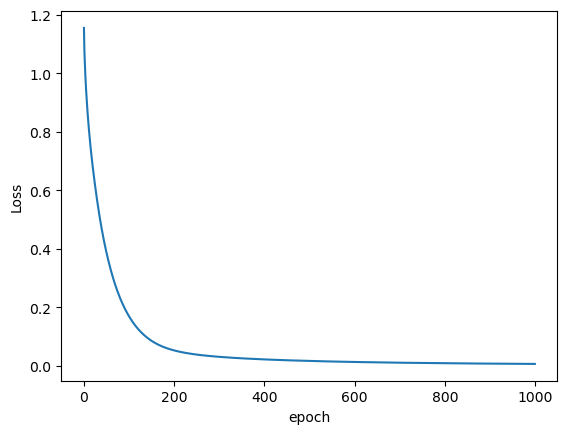

In [20]:
net_insurance_1.train(
    X_train_insurance,
    Y_train_insurance,
    epoch=1000,
    batch_size=32,
    learning_rate=0.0001,
    seed=42,
)

epoch 1/1000   error=1.101011
epoch 2/1000   error=1.017972
epoch 3/1000   error=0.969607
epoch 4/1000   error=0.931356
epoch 5/1000   error=0.899618
epoch 6/1000   error=0.871734
epoch 7/1000   error=0.846966
epoch 8/1000   error=0.824822
epoch 9/1000   error=0.804530
epoch 10/1000   error=0.785590
epoch 11/1000   error=0.768043
epoch 12/1000   error=0.751742
epoch 13/1000   error=0.736405
epoch 14/1000   error=0.721889
epoch 15/1000   error=0.707963
epoch 16/1000   error=0.694818
epoch 17/1000   error=0.682268
epoch 18/1000   error=0.670110
epoch 19/1000   error=0.658257
epoch 20/1000   error=0.646934
epoch 21/1000   error=0.635992
epoch 22/1000   error=0.625464
epoch 23/1000   error=0.615178
epoch 24/1000   error=0.605199
epoch 25/1000   error=0.595458
epoch 26/1000   error=0.586078
epoch 27/1000   error=0.576991
epoch 28/1000   error=0.568174
epoch 29/1000   error=0.559559
epoch 30/1000   error=0.551121
epoch 31/1000   error=0.542930
epoch 32/1000   error=0.534985
epoch 33/1000   e

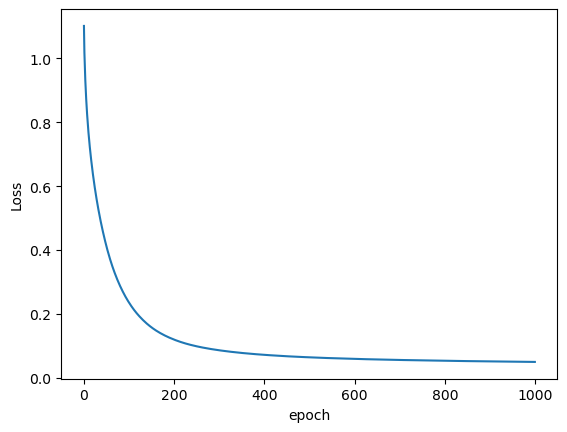

In [21]:
net_insurance_2.train(
    X_train_insurance,
    Y_train_insurance,
    epoch=1000,
    batch_size=32,
    learning_rate=0.0001,
    seed=42,
    l2_lambda=0.1
)

No gráfico acima, podemos observar que o segundo modelo, que utilizou a regularização L2 com uma froça de 0.1, impôs uma limitação no aprendizado dos dados. O modelo 2 apresentou um erro de 0,35 na última época, enquanto o modelo 1 obteve um erro de 0,006. Isso sugere que o modelo 2 sofreu de underfitting

### Teste

In [22]:
out_insurance_1 = net_insurance_1.predict(X_test_insurance)
out_insurance_2 = net_insurance_2.predict(X_test_insurance)

In [23]:
results_df = pd.DataFrame(
    {"Valor Real": Y_test_insurance, "Valor Predito (Modelo 1)": out_insurance_1.flatten(), "Valor Predito (Modelo 2)": out_insurance_2.flatten()}
)

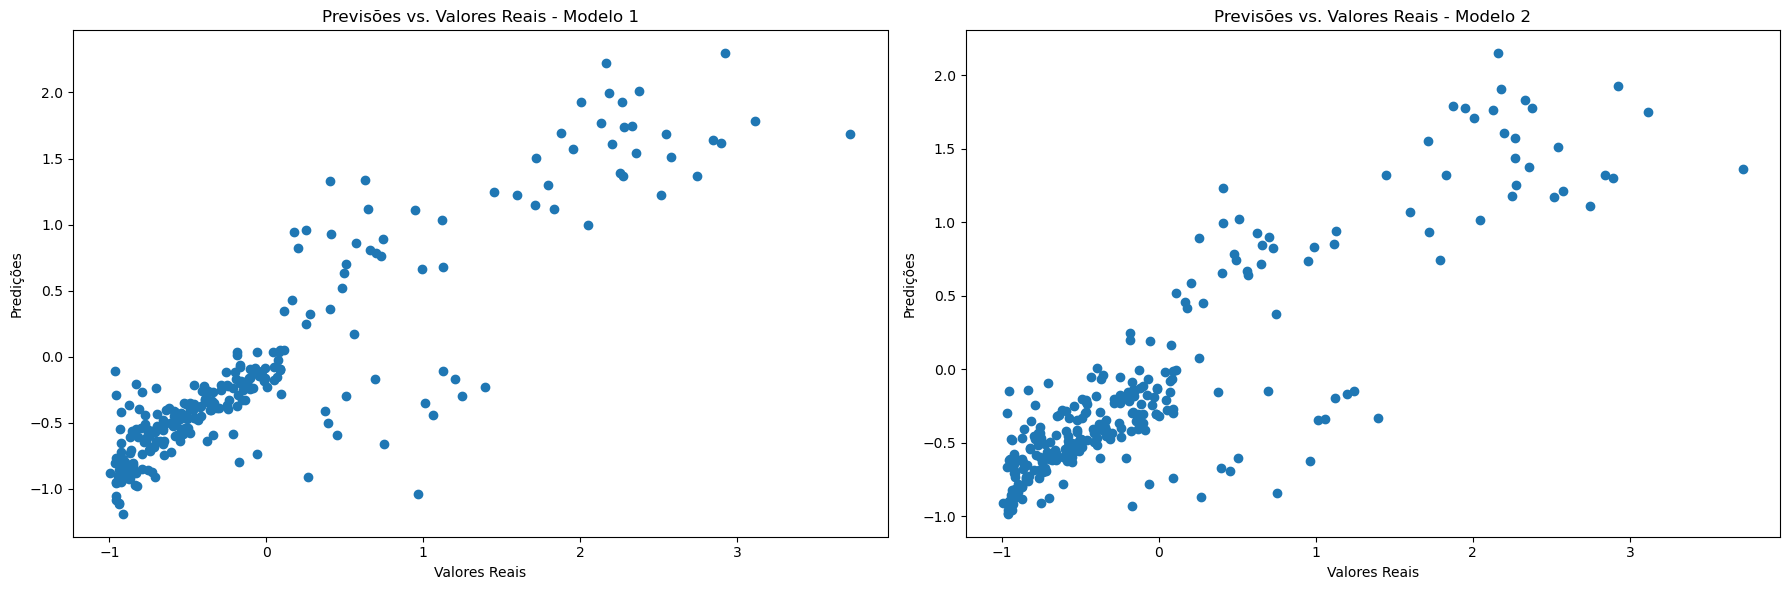

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"])
axes[0].set_xlabel("Valores Reais")
axes[0].set_ylabel("Predições")
axes[0].set_title("Previsões vs. Valores Reais - Modelo 1")


# Plot the predictions against the real values
axes[1].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"])
axes[1].set_xlabel("Valores Reais")
axes[1].set_ylabel("Predições")
axes[1].set_title("Previsões vs. Valores Reais - Modelo 2")

plt.tight_layout()
plt.show()

In [25]:
print(mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"]))
print(mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"]))

0.2092114762329098
0.2511555627807536


Ao analisarmos o gráfico, é evidente que o segundo modelo, que implementou uma regularização L2 de 0,1, apresentou underfitting, com um viés elevado. Isso é demonstrado pela métrica de MSE nos dados de teste, que foi de 0,44, mais que o dobro do valor do modelo 1, que foi aproximadamente 0,21.

### Comparando com o Keras

In [26]:
def net_insurance_keras():
    np.random.seed(42)
    modelo = models.Sequential()
    modelo.add(Dense(128, activation="relu", input_shape=(X_train_insurance.shape[1],)))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dense(800, activation="relu"))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dense(1, activation="linear"))
    # Configurando o Adagrad com taxa de aprendizado de 0.01
    adagrad = Adagrad(learning_rate=0.01)
    modelo.compile(optimizer=adagrad, loss="mse")

    return modelo

In [27]:
net_insurance_keras = net_insurance_keras()

/home/gabrieldadcarvalho/miniconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1735856837.642207  269555 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
hist_insurance = net_insurance_keras.fit(
    X_train_insurance, Y_train_insurance, epochs=1000, batch_size=32
)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6917 
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1989
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1765
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1670
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1573
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1606
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1588
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1329
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1313
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1325
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1418
Epoch 12/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1464
Epoch 13/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1298
Epoch 14/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1538
Epoch 15/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

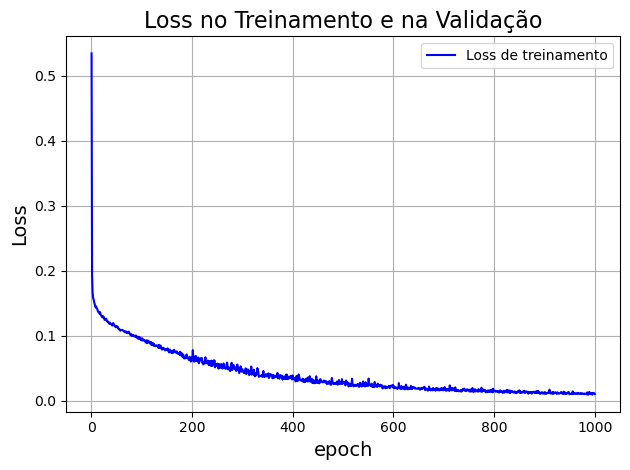

In [29]:
plt.plot(
    range(1, len(hist_insurance.history["loss"]) + 1),
    hist_insurance.history["loss"],
    "-",
    color="blue",
    label="Loss de treinamento",
)
plt.title("Loss no Treinamento e na Validação", fontsize=16)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
out_insurance_keras = net_insurance_keras.predict(X_test_insurance)

results_df["Valor Predito (Keras)"] = out_insurance_keras.flatten()

# Exibir o DataFrame
print(results_df.head())

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
   Valor Real  Valor Predito (Modelo 1)  Valor Predito (Modelo 2)  \
0   -0.406831                 -0.260941                 -0.426039   
1    2.181631                  1.992439                  1.903909   
2    1.792914                  1.299902                  0.742673   
3    0.177763                  0.941347                  0.416933   
4   -0.210680                 -0.232719                 -0.192425   

   Valor Predito (Keras)  
0              -0.374126  
1               2.107017  
2               0.003247  
3              -0.067297  
4              -0.034842  


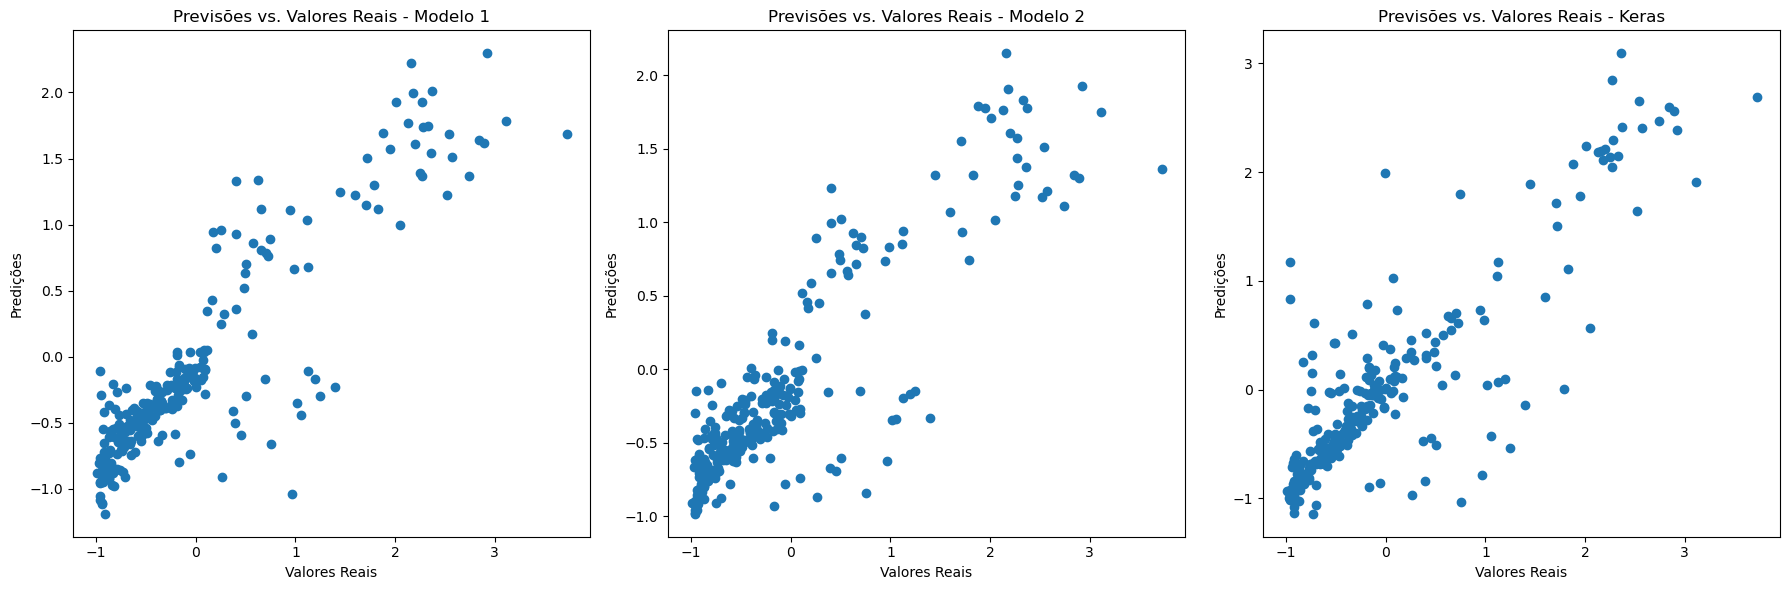

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha e 3 colunas

# Gráfico 1
axes[0].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"])
axes[0].set_xlabel("Valores Reais")
axes[0].set_ylabel("Predições")
axes[0].set_title("Previsões vs. Valores Reais - Modelo 1")

# Gráfico 2
axes[1].scatter(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"])
axes[1].set_xlabel("Valores Reais")
axes[1].set_ylabel("Predições")
axes[1].set_title("Previsões vs. Valores Reais - Modelo 2")

# Gráfico 3
axes[2].scatter(results_df["Valor Real"], results_df["Valor Predito (Keras)"])
axes[2].set_xlabel("Valores Reais")
axes[2].set_ylabel("Predições")
axes[2].set_title("Previsões vs. Valores Reais - Keras")

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [32]:
print(
    "MSE - Modelo 1:",
    mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 1)"]),
)
print(
    "MSE - Modelo 2:",
    mse(results_df["Valor Real"], results_df["Valor Predito (Modelo 2)"]),
)
print(
    "MSE - Modelo Keras:",
    mse(results_df["Valor Real"], results_df["Valor Predito (Keras)"]),
)

MSE - Modelo 1: 0.2092114762329098
MSE - Modelo 2: 0.2511555627807536
MSE - Modelo Keras: 0.24268450323906077


## Iris

### Estrutura da Rede Neural

In [33]:
net_iris_1 = Network()
net_iris_1.add(FCLayer(X_train_iris.shape[1], 64))  # Increased neurons
net_iris_1.add(ActivationLayer(tanh, d_tanh))
net_iris_1.add(FCLayer(64, 32))
net_iris_1.add(ActivationLayer(tanh, d_tanh))
net_iris_1.add(FCLayer(32, 3))
net_iris_1.add(ActivationLayer(softmax, d_softmax))
net_iris_1.loss_use(categorical_crossentropy, d_categorical_crossentropy)

In [34]:
net_iris_2 = Network()
net_iris_2.add(FCLayer(X_train_iris.shape[1], 64))  # Increased neurons
net_iris_2.add(ActivationLayer(tanh, d_tanh))
net_iris_2.add(FCLayer(64, 32))
net_iris_2.add(ActivationLayer(tanh, d_tanh))
net_iris_2.add(FCLayer(32, 3))
net_iris_2.add(ActivationLayer(softmax, d_softmax))
net_iris_2.loss_use(categorical_crossentropy, d_categorical_crossentropy)

Para o banco de dados Iris, foram propostas duas redes neurais para classificação multiclasse, ambas com a mesma estrutura. A única diferença entre os modelos é a variação no valor do hiperparâmetro de L2-regularização (normalização).

A estrutura da rede neural é composta por 4 valores de entrada, conectados à primeira camada oculta com 64 neurônios. Essa camada está totalmente conectada à segunda camada oculta, que possui 32 neurônios, e a camada de saída contém 3 neurônios, com a função de ativação softmax para selecionar o argumento máximo (maior probabilidade) da classe. Todas as camadas ocultas utilizam a função de ativação tanh.

### Treinamento

epoch 1/1000   error=0.889482
epoch 2/1000   error=0.773580
epoch 3/1000   error=0.712914
epoch 4/1000   error=0.670190
epoch 5/1000   error=0.637296
epoch 6/1000   error=0.610708
epoch 7/1000   error=0.588532
epoch 8/1000   error=0.569618
epoch 9/1000   error=0.553214
epoch 10/1000   error=0.538799
epoch 11/1000   error=0.525996
epoch 12/1000   error=0.514522
epoch 13/1000   error=0.504164
epoch 14/1000   error=0.494751
epoch 15/1000   error=0.486150
epoch 16/1000   error=0.478250
epoch 17/1000   error=0.470964
epoch 18/1000   error=0.464216
epoch 19/1000   error=0.457945
epoch 20/1000   error=0.452097
epoch 21/1000   error=0.446628
epoch 22/1000   error=0.441499
epoch 23/1000   error=0.436677
epoch 24/1000   error=0.432133
epoch 25/1000   error=0.427841
epoch 26/1000   error=0.423778
epoch 27/1000   error=0.419927
epoch 28/1000   error=0.416267
epoch 29/1000   error=0.412785
epoch 30/1000   error=0.409467
epoch 31/1000   error=0.406299
epoch 32/1000   error=0.403270
epoch 33/1000   e

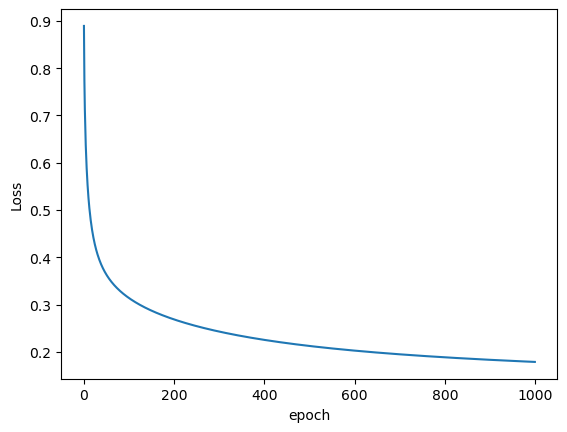

In [35]:
net_iris_1.train(
    X_train_iris,
    Y_train_iris_one_hot,
    epoch=1000,
    batch_size=32,
    learning_rate=0.001,
    seed=42,
)

epoch 1/1000   error=1.347020
epoch 2/1000   error=1.146621
epoch 3/1000   error=1.036413
epoch 4/1000   error=0.957203
epoch 5/1000   error=0.895573
epoch 6/1000   error=0.845516
epoch 7/1000   error=0.803713
epoch 8/1000   error=0.768106
epoch 9/1000   error=0.737316
epoch 10/1000   error=0.710373
epoch 11/1000   error=0.686564
epoch 12/1000   error=0.665351
epoch 13/1000   error=0.646317
epoch 14/1000   error=0.629133
epoch 15/1000   error=0.613536
epoch 16/1000   error=0.599312
epoch 17/1000   error=0.586282
epoch 18/1000   error=0.574301
epoch 19/1000   error=0.563245
epoch 20/1000   error=0.553009
epoch 21/1000   error=0.543504
epoch 22/1000   error=0.534654
epoch 23/1000   error=0.526392
epoch 24/1000   error=0.518662
epoch 25/1000   error=0.511412
epoch 26/1000   error=0.504600
epoch 27/1000   error=0.498186
epoch 28/1000   error=0.492136
epoch 29/1000   error=0.486420
epoch 30/1000   error=0.481011
epoch 31/1000   error=0.475884
epoch 32/1000   error=0.471017
epoch 33/1000   e

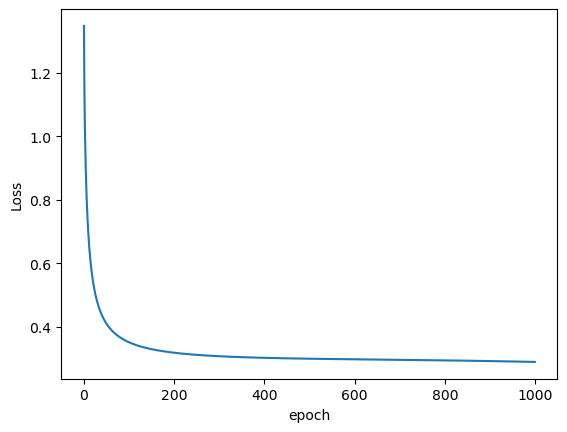

In [36]:
net_iris_2.train(
    X_train_iris,
    Y_train_iris_one_hot,
    epoch=1000,
    batch_size=32,
    learning_rate=0.001,
    seed=42,
    l2_lambda=0.02
)

No histórico de erros e gráfico acima podemos ver que os dois modelos apresentaram a queda de erro praticamente identica, isso sugere que a regularização l2 não trouxe nenhuma mudança para o aprendizado da rede. Para verificar mais detalhadamente o desempenho da rede podemos ver abaixo a matrix de confusão para os dados de teste.

### Teste

In [44]:
out_iris_1 = net_iris_1.predict(X_test_iris)
out_iris_2 = net_iris_2.predict(X_test_iris)

In [45]:
argmax_iris_1 = []
argmax_iris_2 = []
for i in range(X_test_iris.shape[0]):
    argmax_iris_1.append(np.argmax(out_iris_1[i]))
    argmax_iris_2.append(np.argmax(out_iris_2[i]))

In [46]:
results_df_iris = {'Valor Real': Y_test_iris, 'Valor Predito (Modelo 1)': argmax_iris_1, 'Valor Predito (Modelo 2)': argmax_iris_2}

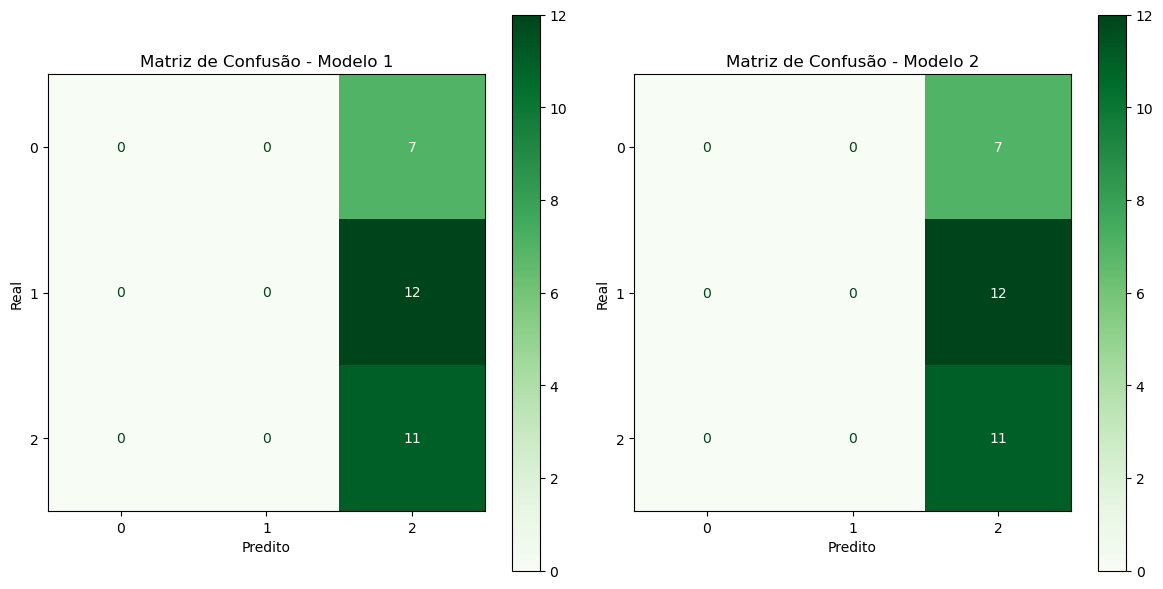

In [48]:
y_true = results_df_iris["Valor Real"]
y_pred_1 = results_df_iris["Valor Predito (Modelo 1)"]
y_pred_2 = results_df_iris["Valor Predito (Modelo 2)"]

cm_1 = confusion_matrix(y_true, y_pred_1)
cm_2 = confusion_matrix(y_true, y_pred_2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp_1.plot(cmap="Greens", ax=axes[0])
axes[0].set_title("Matriz de Confusão - Modelo 1")
axes[0].set_xlabel("Predito")
axes[0].set_ylabel("Real")

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp_2.plot(cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusão - Modelo 2")
axes[1].set_xlabel("Predito")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

In [243]:
print(categ_iris)

{'species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}


Como pode ser observado na matriz acima, o modelo 1 classifica todas as plantas como pertencentes à classe 0 ('iris-setosa'), enquanto o modelo 2 classifica todas as plantas como pertencentes à classe 2 ('iris-virginica'). Portanto, podemos concluir que os modelos são excessivamente simples para realizar as predições adequadas.

### Comparando com o Keras

In [50]:
def net_iris_keras():
    np.random.seed(42)
    modelo = models.Sequential()
    modelo.add(Dense(64, activation="tanh", input_shape=(X_train_iris.shape[1],)))
    modelo.add(Dense(32, activation="tanh"))
    modelo.add(Dense(3, activation="softmax"))
    # Configurando o Adagrad com taxa de aprendizado de 0.01
    adagrad = Adagrad(learning_rate=0.01)
    modelo.compile(optimizer=adagrad, loss="categorical_crossentropy")

    return modelo

In [52]:
net_iris_keras = net_iris_keras()

In [53]:
hist_iris = net_iris_keras.fit(
    X_train_iris, Y_train_iris_one_hot, epochs=1000, batch_size=32
)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0362  
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8046 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6836 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6022 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5215 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5066 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4636 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4519
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4196
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4153
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3994 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4171 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3961
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4065
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3602 
Epo

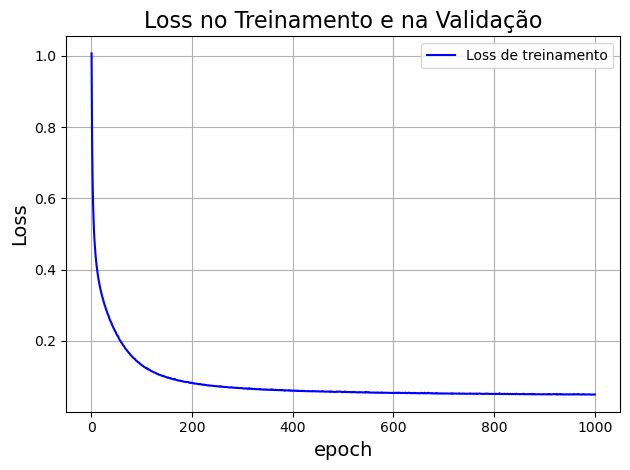

In [54]:
plt.plot(
    range(1, len(hist_iris.history["loss"]) + 1),
    hist_iris.history["loss"],
    "-",
    color="blue",
    label="Loss de treinamento",
)
plt.title("Loss no Treinamento e na Validação", fontsize=16)
plt.xlabel("epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [56]:
out_iris_keras = net_iris_keras.predict(X_test_iris)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [59]:
argmax_iris_keras = []
for i in range(X_test_iris.shape[0]):
    argmax_iris_keras.append(np.argmax(out_iris_keras[i]))

results_df_iris["Valor Predito (Keras)"] = argmax_iris_keras

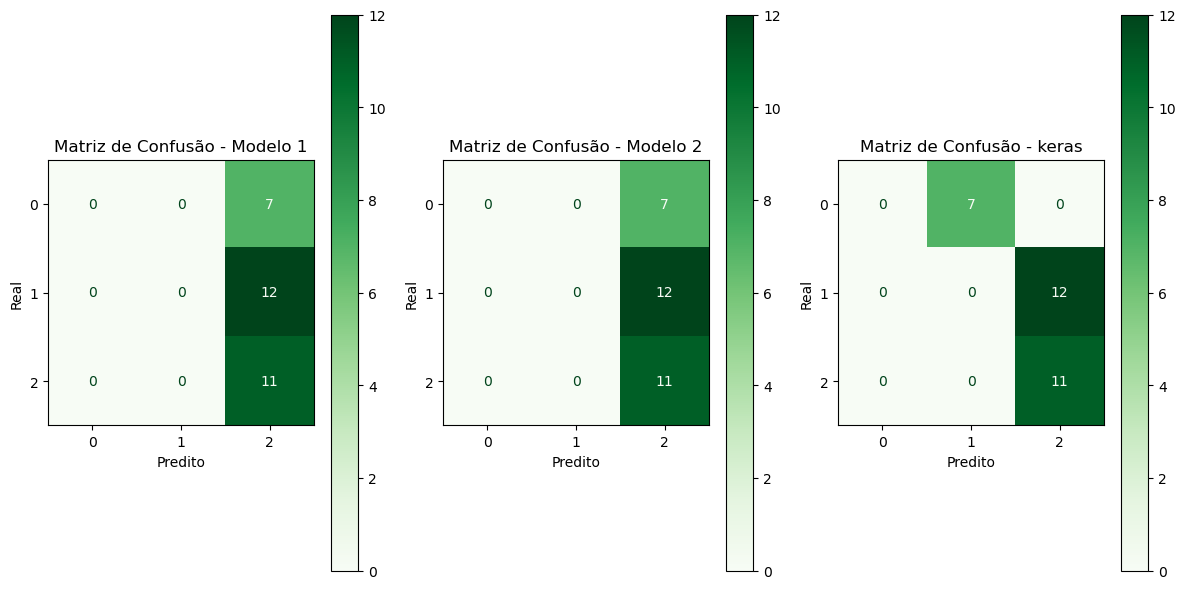

In [66]:
y_true = results_df_iris["Valor Real"]
y_pred_1 = results_df_iris["Valor Predito (Modelo 1)"]
y_pred_2 = results_df_iris["Valor Predito (Modelo 2)"]

cm_1 = confusion_matrix(y_true, results_df_iris["Valor Predito (Modelo 1)"])
cm_2 = confusion_matrix(y_true, results_df_iris["Valor Predito (Modelo 2)"])
cm_keras = confusion_matrix(y_true, results_df_iris["Valor Predito (Keras)"])

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp_1.plot(cmap="Greens", ax=axes[0])
axes[0].set_title("Matriz de Confusão - Modelo 1")
axes[0].set_xlabel("Predito")
axes[0].set_ylabel("Real")

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp_2.plot(cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusão - Modelo 2")
axes[1].set_xlabel("Predito")
axes[1].set_ylabel("Real")

disp_keras = ConfusionMatrixDisplay(confusion_matrix=cm_keras)
disp_keras.plot(cmap="Greens", ax=axes[2])
axes[2].set_title("Matriz de Confusão - keras")
axes[2].set_xlabel("Predito")
axes[2].set_ylabel("Real")

plt.tight_layout()
plt.show()